In [1]:
# Importation des packaques et du dataset
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression,ElasticNet
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import GradientBoostingRegressor

import warnings
warnings.filterwarnings(action='ignore')

!pip install category_encoders
import category_encoders as ce
ohe = ce.OneHotEncoder()
oe = ce.OrdinalEncoder()

# Importation du fichier de scraping
df = pd.read_csv('vgsales.csv',index_col=False)

# Retrait des variables inutiles
df.drop(['Rank','Name','gamename','serie','NA_Sales','EU_Sales','JP_Sales','Other_Sales','metaNoteQ','samename'],axis=1,inplace=True)


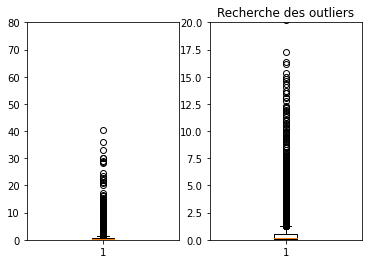

In [2]:
# Recherche des outliers
#plt.scatter(df.index,df['Global_Sales']);

plt.subplot(1,2,1)
plt.boxplot(df['Global_Sales']);
plt.ylim([0,80]);

plt.subplot(1,2,2)
plt.boxplot(df['Global_Sales']);
plt.ylim([0,20]);

plt.title("Recherche des outliers")

# Retrait des outliers
#df = df[df['Global_Sales']<20]

# Recherche des données manquantes
df.isnull().sum()

# Remplacement des années manquantes par 0 (autres)
df[['Year','metaNote','metaNbVote','userNote','userNbVote']] = df[['Year','metaNote','metaNbVote','userNote','userNbVote']].fillna(0)

# Remplacement des Publishers manquants par unknown
df['Publisher'] = df['Publisher'].fillna('unknown')

# Traitement des données catégorielles
df2 = ohe.fit_transform(df)

In [153]:
df2.info(20)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11540 entries, 0 to 11539
Data columns (total 469 columns):
 #    Column         Dtype  
---   ------         -----  
 0    Platform_1     int64  
 1    Platform_2     int64  
 2    Platform_3     int64  
 3    Platform_4     int64  
 4    Platform_5     int64  
 5    Platform_6     int64  
 6    Platform_7     int64  
 7    Platform_8     int64  
 8    Platform_9     int64  
 9    Platform_10    int64  
 10   Platform_11    int64  
 11   Platform_12    int64  
 12   Platform_13    int64  
 13   Platform_14    int64  
 14   Platform_15    int64  
 15   Platform_16    int64  
 16   Platform_17    int64  
 17   Platform_18    int64  
 18   Platform_19    int64  
 19   Platform_20    int64  
 20   Platform_21    int64  
 21   Platform_22    int64  
 22   Platform_23    int64  
 23   Platform_24    int64  
 24   Platform_25    int64  
 25   Platform_26    int64  
 26   Platform_27    int64  
 27   Platform_28    int64  
 28   Platform_29   

In [3]:
# preprocessing

#scaler = preprocessing.RobustScaler().fit_transform(df2)

# définition de la target et data
target = np.log(df2['Global_Sales'])
data = df2.drop(['Global_Sales'],axis=1)

# séparation en jeu d'entrainement et de test
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2)
scaler = preprocessing.RobustScaler()
X_train_scaled = scaler.fit_transform(X_train[['Year','metaNote','metaNbVote','userNote','userNbVote']])
X_test_scaled = scaler.transform(X_test[['Year','metaNote','metaNbVote','userNote','userNbVote']])


Régression Linéaire

In [4]:
# Test du modèle de Régression Linéaire

# Brut
lr = LinearRegression()
lr.fit(X_train, y_train)

print("Train score :", lr.score(X_train,y_train))
print("Test score :",lr.score(X_test,y_test))

y_pred = lr.predict(X_test)
print("MAE : ",mean_absolute_error(y_test, y_pred))

Train score : 0.47376244826858627
Test score : 0.43260806926688966
MAE :  0.8345241144006093


In [5]:
# Test du modèle de Régression Linéaire


lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

print("Train score :", lr.score(X_train_scaled,y_train))
print("Test score :",lr.score(X_test_scaled,y_test))

y_pred = lr.predict(X_test_scaled)
print("MAE : ",mean_absolute_error(y_test, y_pred))

Train score : 0.16600679663434303
Test score : 0.1576436566215208
MAE :  1.0401960630222862


Modèle Ridge

In [6]:
# Test du modèle Ridge
RD_model = Ridge()

tuned_parameters = {'alpha': list(x / 10 for x in range(1, 101)),
                    'fit_intercept': [True,False], 
                    'normalize' :[False, True],
                    'solver': ['auto', 'cholesky', 'lsqr', 'sparse_cg', 'lbfgs']}

RD = GridSearchCV(RD_model, tuned_parameters, cv = 10)
RD.fit(X_train, y_train)

print("Train score :", RD.score(X_train,y_train))
print("Test score :",RD.score(X_test,y_test))

y_pred = RD.predict(X_test)
print("MAE : ",mean_absolute_error(y_test, y_pred))

print ("Best Params", RD.best_params_)
print ("Best Score", RD.best_score_)

Train score : 0.4560916697650559
Test score : 0.4249245663159499
MAE :  0.8472235247691127
Best Params {'alpha': 0.3, 'fit_intercept': True, 'normalize': True, 'solver': 'auto'}
Best Score 0.38133075887123447


In [6]:
ridge = Ridge(alpha=10,fit_intercept=True,normalize=False,solver='auto')
ridge.fit(X_train_scaled, y_train)

print("Train score :", ridge.score(X_train_scaled,y_train))
print("Test score :",ridge.score(X_test_scaled,y_test))

y_pred = ridge.predict(X_test_scaled)
print("MAE : ",mean_absolute_error(y_test, y_pred))

Train score : 0.1668844880419489
Test score : 0.15502075826121686
MAE :  1.0413085394614725


In [8]:
# Test du modèle Lasso

from sklearn.linear_model import Lasso
LS_model = Lasso()

tuned_parameters = {'alpha': list(x / 10 for x in range(1, 101)),
                    'fit_intercept': [True,False], 
                    'normalize' :[False, True],
                    'selection': ['cyclic', 'random']}

from sklearn.model_selection import GridSearchCV
LS = GridSearchCV(LS_model, tuned_parameters, cv = 10)
LS.fit(X_train_scaled, y_train)

print("Train score :", LS.score(X_train_scaled,y_train))
print("Test score :",LS.score(X_test_scaled,y_test))

y_pred = LS.predict(X_test_scaled)
print("MAE : ",mean_absolute_error(y_test, y_pred))

print ("Best Params", LS.best_params_)
print ("Best Score", LS.best_score_)

Train score : 0.15593876537045048
Test score : 0.15205673109413254
MAE :  1.0487545636598894
Best Params {'alpha': 0.1, 'fit_intercept': True, 'normalize': False, 'selection': 'random'}
Best Score 0.15453673094745718


In [9]:
lasso = Lasso(alpha=0.1,fit_intercept=True,normalize=False,selection='random')
lasso.fit(X_train,y_train)
print("Train score :", lasso.score(X_train,y_train))
print("Test score :",lasso.score(X_test,y_test))

y_pred = lasso.predict(X_test)
print("MAE : ",mean_absolute_error(y_test, y_pred))

Train score : 0.1653281154368631
Test score : 0.15579552034854138
MAE :  1.0413466078655278


In [10]:
# Test du modèle ElasticNet

EN_model = ElasticNet()

tuned_parameters = {'alpha': list(x / 10 for x in range(1, 101)),
                    'fit_intercept': [True,False], 
                    'normalize' :[False, True],
                    'selection': ['cyclic', 'random']}

EN = GridSearchCV(EN_model, tuned_parameters, cv = 10)
EN.fit(X_train_scaled, y_train)

print("Train score :", EN.score(X_train_scaled,y_train))
print("Test score :",EN.score(X_test_scaled,y_test))

y_pred = EN.predict(X_test_scaled)
print("MAE : ",mean_absolute_error(y_test, y_pred))

print ("Best Params", EN.best_params_)
print ("Best Score", EN.best_score_)

Train score : 0.16253308747496042
Test score : 0.1589226631909687
MAE :  1.043693384765019
Best Params {'alpha': 0.1, 'fit_intercept': True, 'normalize': False, 'selection': 'cyclic'}
Best Score 0.1568014778262937


In [11]:
enet = ElasticNet(alpha=0.1,fit_intercept=True,normalize=False,selection='cyclic')
enet.fit(X_train,y_train)
print("Train score :", enet.score(X_train,y_train))
print("Test score :",enet.score(X_test,y_test))

y_pred = enet.predict(X_test)
print("MAE : ",mean_absolute_error(y_test, y_pred))

Train score : 0.20755306617657654
Test score : 0.196963685511081
MAE :  1.0182303197408322


In [92]:
df3=df
df3[["Genre","Publisher", "Platform"]] = oe.fit_transform(df[["Genre","Publisher","Platform"]])
target = (df3['Global_Sales']*100).astype('int')
data = df3.drop(['Global_Sales'],axis=1)

# séparation en jeu d'entrainement et de test
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2)

# Scale
scaler = preprocessing.StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [77]:
# Test modèle KNN

knn = KNeighborsClassifier(n_neighbors=3, metric='minkowski')
knn.fit(X_train_scaled,y_train)
print("Train score :", knn.score(X_train_scaled,y_train))
print("Test score :",knn.score(X_test_scaled,y_test))

y_pred = knn.predict(X_test)
print("MAE : ",mean_absolute_error(y_test, y_pred))

Train score : 0.3083523406104051
Test score : 0.03735881841876629
MAE :  136.4522154648132


In [149]:
# Test du modèle xgboost

parameters = { 'loss' : ['squared_error', 'absolute_error', 'huber', 'quantile'],
              'learning_rate' : (0.05,0,1,0.25,0.50,1),
              'criterion' : ['friedman_mse','squared_error', 'mse', 'mae'],
              'max_features' : ['auto', 'sqrt', 'log2']
             }

#model = grid.fit(X_train,y_train)
#print(model.best_params_,'\n')
#print(model.best_estimator_,'\n')

grid = GridSearchCV(GradientBoostingRegressor(),parameters)
gbr = GradientBoostingRegressor()
grid.fit(X_train_scaled,y_train)

print("Train score :", grid.score(X_train_scaled, y_train))
print("Test score :",grid.score(X_test_scaled, y_test))

y_pred = grid.predict(X_test)
print("MAE : ",mean_absolute_error(y_test, y_pred))

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 448, in fit
    self._check_params()
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 239, in _check_params
    raise ValueError("Loss '{0:s}' not supported. ".format(self.loss))
ValueError: Loss 'squared_error' not supported. 

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 448, in fit
    self._check_params()
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 239, in _check_params
    raise ValueError("Loss '{0:s}' not supported. ".format(self.loss))
ValueError: Loss 'squared_error' not supported. 

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 448, in fit
    self._check_params()
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 239, in _check_params
    raise ValueError("Loss '{0:s}' not supported. ".format(self.loss))
ValueError: Loss 'absolute_error' not supported. 

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partitio

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 448, in fit
    self._check_params()
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 234, in _check_params
    raise ValueError("learning_rate must be greater than 0 but "
ValueError: learning_rate must be greater than 0 but was 0

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test parti

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 448, in fit
    self._check_params()
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 234, in _check_params
    raise ValueError("learning_rate must be greater than 0 but "
ValueError: learning_rate must be greater than 0 but was 0

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test parti

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 448, in fit
    self._check_params()
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 234, in _check_params
    raise ValueError("learning_rate must be greater than 0 but "
ValueError: learning_rate must be greater than 0 but was 0

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test parti

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 448, in fit
    self._check_params()
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 234, in _check_params
    raise ValueError("learning_rate must be greater than 0 but "
ValueError: learning_rate must be greater than 0 but was 0

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test parti

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 448, in fit
    self._check_params()
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 234, in _check_params
    raise ValueError("learning_rate must be greater than 0 but "
ValueError: learning_rate must be greater than 0 but was 0

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test parti

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 448, in fit
    self._check_params()
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 234, in _check_params
    raise ValueError("learning_rate must be greater than 0 but "
ValueError: learning_rate must be greater than 0 but was 0

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test parti

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 448, in fit
    self._check_params()
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 239, in _check_params
    raise ValueError("Loss '{0:s}' not supported. ".format(self.loss))
ValueError: Loss 'squared_error' not supported. 

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 448, in fit
    self._check_params()
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 239, in _check_params
    raise ValueError("Loss '{0:s}' not supported. ".format(self.loss))
ValueError: Loss 'absolute_error' not supported. 

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partitio

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 448, in fit
    self._check_params()
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 239, in _check_params
    raise ValueError("Loss '{0:s}' not supported. ".format(self.loss))
ValueError: Loss 'squared_error' not supported. 

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 448, in fit
    self._check_params()
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 239, in _check_params
    raise ValueError("Loss '{0:s}' not supported. ".format(self.loss))
ValueError: Loss 'squared_error' not supported. 

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 448, in fit
    self._check_params()
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 239, in _check_params
    raise ValueError("Loss '{0:s}' not supported. ".format(self.loss))
ValueError: Loss 'absolute_error' not supported. 

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partitio

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 448, in fit
    self._check_params()
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 239, in _check_params
    raise ValueError("Loss '{0:s}' not supported. ".format(self.loss))
ValueError: Loss 'squared_error' not supported. 

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 448, in fit
    self._check_params()
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 239, in _check_params
    raise ValueError("Loss '{0:s}' not supported. ".format(self.loss))
ValueError: Loss 'absolute_error' not supported. 

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partitio

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 448, in fit
    self._check_params()
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 239, in _check_params
    raise ValueError("Loss '{0:s}' not supported. ".format(self.loss))
ValueError: Loss 'absolute_error' not supported. 

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partitio

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 448, in fit
    self._check_params()
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 239, in _check_params
    raise ValueError("Loss '{0:s}' not supported. ".format(self.loss))
ValueError: Loss 'squared_error' not supported. 

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 448, in fit
    self._check_params()
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 239, in _check_params
    raise ValueError("Loss '{0:s}' not supported. ".format(self.loss))
ValueError: Loss 'absolute_error' not supported. 

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partitio

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 448, in fit
    self._check_params()
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 239, in _check_params
    raise ValueError("Loss '{0:s}' not supported. ".format(self.loss))
ValueError: Loss 'squared_error' not supported. 

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 448, in fit
    self._check_params()
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 239, in _check_params
    raise ValueError("Loss '{0:s}' not supported. ".format(self.loss))
ValueError: Loss 'absolute_error' not supported. 

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partitio

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 448, in fit
    self._check_params()
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 239, in _check_params
    raise ValueError("Loss '{0:s}' not supported. ".format(self.loss))
ValueError: Loss 'absolute_error' not supported. 

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partitio

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 504, in fit
    n_stages = self._fit_stages(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 561, in _fit_stages
    raw_predictions = self._fit_stage(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 214, in _fit_stage
    tree.fit(X, residual, sample_weight=sample_weight,
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 1247, in fit
    super().fit(
  File "/opt/anaconda3/lib/python3.8/site

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 504, in fit
    n_stages = self._fit_stages(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 561, in _fit_stages
    raw_predictions = self._fit_stage(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 214, in _fit_stage
    tree.fit(X, residual, sample_weight=sample_weight,
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 1247, in fit
    super().fit(
  File "/opt/anaconda3/lib/python3.8/site

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 504, in fit
    n_stages = self._fit_stages(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 561, in _fit_stages
    raw_predictions = self._fit_stage(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 214, in _fit_stage
    tree.fit(X, residual, sample_weight=sample_weight,
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 1247, in fit
    super().fit(
  File "/opt/anaconda3/lib/python3.8/site

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 448, in fit
    self._check_params()
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 234, in _check_params
    raise ValueError("learning_rate must be greater than 0 but "
ValueError: learning_rate must be greater than 0 but was 0

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test parti

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 448, in fit
    self._check_params()
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 234, in _check_params
    raise ValueError("learning_rate must be greater than 0 but "
ValueError: learning_rate must be greater than 0 but was 0

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test parti

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 448, in fit
    self._check_params()
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 234, in _check_params
    raise ValueError("learning_rate must be greater than 0 but "
ValueError: learning_rate must be greater than 0 but was 0

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test parti

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 448, in fit
    self._check_params()
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 234, in _check_params
    raise ValueError("learning_rate must be greater than 0 but "
ValueError: learning_rate must be greater than 0 but was 0

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test parti

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 448, in fit
    self._check_params()
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 234, in _check_params
    raise ValueError("learning_rate must be greater than 0 but "
ValueError: learning_rate must be greater than 0 but was 0

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test parti

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 448, in fit
    self._check_params()
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 239, in _check_params
    raise ValueError("Loss '{0:s}' not supported. ".format(self.loss))
ValueError: Loss 'squared_error' not supported. 

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 448, in fit
    self._check_params()
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 239, in _check_params
    raise ValueError("Loss '{0:s}' not supported. ".format(self.loss))
ValueError: Loss 'squared_error' not supported. 

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 448, in fit
    self._check_params()
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 239, in _check_params
    raise ValueError("Loss '{0:s}' not supported. ".format(self.loss))
ValueError: Loss 'absolute_error' not supported. 

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partitio

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 504, in fit
    n_stages = self._fit_stages(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 561, in _fit_stages
    raw_predictions = self._fit_stage(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 214, in _fit_stage
    tree.fit(X, residual, sample_weight=sample_weight,
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 1247, in fit
    super().fit(
  File "/opt/anaconda3/lib/python3.8/site

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 504, in fit
    n_stages = self._fit_stages(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 561, in _fit_stages
    raw_predictions = self._fit_stage(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 214, in _fit_stage
    tree.fit(X, residual, sample_weight=sample_weight,
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 1247, in fit
    super().fit(
  File "/opt/anaconda3/lib/python3.8/site

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 504, in fit
    n_stages = self._fit_stages(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 561, in _fit_stages
    raw_predictions = self._fit_stage(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 214, in _fit_stage
    tree.fit(X, residual, sample_weight=sample_weight,
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 1247, in fit
    super().fit(
  File "/opt/anaconda3/lib/python3.8/site

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 448, in fit
    self._check_params()
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 239, in _check_params
    raise ValueError("Loss '{0:s}' not supported. ".format(self.loss))
ValueError: Loss 'squared_error' not supported. 

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 448, in fit
    self._check_params()
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 239, in _check_params
    raise ValueError("Loss '{0:s}' not supported. ".format(self.loss))
ValueError: Loss 'squared_error' not supported. 

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 448, in fit
    self._check_params()
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 239, in _check_params
    raise ValueError("Loss '{0:s}' not supported. ".format(self.loss))
ValueError: Loss 'absolute_error' not supported. 

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partitio

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 504, in fit
    n_stages = self._fit_stages(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 561, in _fit_stages
    raw_predictions = self._fit_stage(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 214, in _fit_stage
    tree.fit(X, residual, sample_weight=sample_weight,
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 1247, in fit
    super().fit(
  File "/opt/anaconda3/lib/python3.8/site

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 504, in fit
    n_stages = self._fit_stages(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 561, in _fit_stages
    raw_predictions = self._fit_stage(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 214, in _fit_stage
    tree.fit(X, residual, sample_weight=sample_weight,
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 1247, in fit
    super().fit(
  File "/opt/anaconda3/lib/python3.8/site

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 504, in fit
    n_stages = self._fit_stages(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 561, in _fit_stages
    raw_predictions = self._fit_stage(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 214, in _fit_stage
    tree.fit(X, residual, sample_weight=sample_weight,
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 1247, in fit
    super().fit(
  File "/opt/anaconda3/lib/python3.8/site

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 504, in fit
    n_stages = self._fit_stages(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 561, in _fit_stages
    raw_predictions = self._fit_stage(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 214, in _fit_stage
    tree.fit(X, residual, sample_weight=sample_weight,
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 1247, in fit
    super().fit(
  File "/opt/anaconda3/lib/python3.8/site

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 448, in fit
    self._check_params()
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 239, in _check_params
    raise ValueError("Loss '{0:s}' not supported. ".format(self.loss))
ValueError: Loss 'squared_error' not supported. 

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 448, in fit
    self._check_params()
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 239, in _check_params
    raise ValueError("Loss '{0:s}' not supported. ".format(self.loss))
ValueError: Loss 'absolute_error' not supported. 

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partitio

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 448, in fit
    self._check_params()
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 239, in _check_params
    raise ValueError("Loss '{0:s}' not supported. ".format(self.loss))
ValueError: Loss 'absolute_error' not supported. 

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partitio

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 504, in fit
    n_stages = self._fit_stages(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 561, in _fit_stages
    raw_predictions = self._fit_stage(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 214, in _fit_stage
    tree.fit(X, residual, sample_weight=sample_weight,
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 1247, in fit
    super().fit(
  File "/opt/anaconda3/lib/python3.8/site

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 504, in fit
    n_stages = self._fit_stages(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 561, in _fit_stages
    raw_predictions = self._fit_stage(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 214, in _fit_stage
    tree.fit(X, residual, sample_weight=sample_weight,
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 1247, in fit
    super().fit(
  File "/opt/anaconda3/lib/python3.8/site

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 504, in fit
    n_stages = self._fit_stages(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 561, in _fit_stages
    raw_predictions = self._fit_stage(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 214, in _fit_stage
    tree.fit(X, residual, sample_weight=sample_weight,
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 1247, in fit
    super().fit(
  File "/opt/anaconda3/lib/python3.8/site

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 504, in fit
    n_stages = self._fit_stages(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 561, in _fit_stages
    raw_predictions = self._fit_stage(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 214, in _fit_stage
    tree.fit(X, residual, sample_weight=sample_weight,
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 1247, in fit
    super().fit(
  File "/opt/anaconda3/lib/python3.8/site

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 448, in fit
    self._check_params()
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 239, in _check_params
    raise ValueError("Loss '{0:s}' not supported. ".format(self.loss))
ValueError: Loss 'squared_error' not supported. 

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 448, in fit
    self._check_params()
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 239, in _check_params
    raise ValueError("Loss '{0:s}' not supported. ".format(self.loss))
ValueError: Loss 'absolute_error' not supported. 

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partitio

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 504, in fit
    n_stages = self._fit_stages(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 561, in _fit_stages
    raw_predictions = self._fit_stage(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 214, in _fit_stage
    tree.fit(X, residual, sample_weight=sample_weight,
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 1247, in fit
    super().fit(
  File "/opt/anaconda3/lib/python3.8/site

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 504, in fit
    n_stages = self._fit_stages(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 561, in _fit_stages
    raw_predictions = self._fit_stage(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 214, in _fit_stage
    tree.fit(X, residual, sample_weight=sample_weight,
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 1247, in fit
    super().fit(
  File "/opt/anaconda3/lib/python3.8/site

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 504, in fit
    n_stages = self._fit_stages(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 561, in _fit_stages
    raw_predictions = self._fit_stage(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 214, in _fit_stage
    tree.fit(X, residual, sample_weight=sample_weight,
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 1247, in fit
    super().fit(
  File "/opt/anaconda3/lib/python3.8/site

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 504, in fit
    n_stages = self._fit_stages(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 561, in _fit_stages
    raw_predictions = self._fit_stage(
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 214, in _fit_stage
    tree.fit(X, residual, sample_weight=sample_weight,
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 1247, in fit
    super().fit(
  File "/opt/anaconda3/lib/python3.8/site

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 448, in fit
    self._check_params()
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 239, in _check_params
    raise ValueError("Loss '{0:s}' not supported. ".format(self.loss))
ValueError: Loss 'squared_error' not supported. 

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 448, in fit
    self._check_params()
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 239, in _check_params
    raise ValueError("Loss '{0:s}' not supported. ".format(self.loss))
ValueError: Loss 'absolute_error' not supported. 

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partitio

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 448, in fit
    self._check_params()
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 239, in _check_params
    raise ValueError("Loss '{0:s}' not supported. ".format(self.loss))
ValueError: Loss 'absolute_error' not supported. 

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partitio

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 448, in fit
    self._check_params()
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 234, in _check_params
    raise ValueError("learning_rate must be greater than 0 but "
ValueError: learning_rate must be greater than 0 but was 0

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test parti

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 448, in fit
    self._check_params()
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 234, in _check_params
    raise ValueError("learning_rate must be greater than 0 but "
ValueError: learning_rate must be greater than 0 but was 0

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test parti

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 448, in fit
    self._check_params()
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 234, in _check_params
    raise ValueError("learning_rate must be greater than 0 but "
ValueError: learning_rate must be greater than 0 but was 0

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test parti

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 448, in fit
    self._check_params()
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 234, in _check_params
    raise ValueError("learning_rate must be greater than 0 but "
ValueError: learning_rate must be greater than 0 but was 0

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test parti

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 448, in fit
    self._check_params()
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 234, in _check_params
    raise ValueError("learning_rate must be greater than 0 but "
ValueError: learning_rate must be greater than 0 but was 0

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test parti

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 448, in fit
    self._check_params()
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 239, in _check_params
    raise ValueError("Loss '{0:s}' not supported. ".format(self.loss))
ValueError: Loss 'squared_error' not supported. 

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 448, in fit
    self._check_params()
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 239, in _check_params
    raise ValueError("Loss '{0:s}' not supported. ".format(self.loss))
ValueError: Loss 'squared_error' not supported. 

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 448, in fit
    self._check_params()
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 239, in _check_params
    raise ValueError("Loss '{0:s}' not supported. ".format(self.loss))
ValueError: Loss 'absolute_error' not supported. 

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partitio

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 448, in fit
    self._check_params()
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 239, in _check_params
    raise ValueError("Loss '{0:s}' not supported. ".format(self.loss))
ValueError: Loss 'squared_error' not supported. 

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 448, in fit
    self._check_params()
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 239, in _check_params
    raise ValueError("Loss '{0:s}' not supported. ".format(self.loss))
ValueError: Loss 'absolute_error' not supported. 

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partitio

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 448, in fit
    self._check_params()
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 239, in _check_params
    raise ValueError("Loss '{0:s}' not supported. ".format(self.loss))
ValueError: Loss 'squared_error' not supported. 

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 448, in fit
    self._check_params()
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 239, in _check_params
    raise ValueError("Loss '{0:s}' not supported. ".format(self.loss))
ValueError: Loss 'squared_error' not supported. 

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 448, in fit
    self._check_params()
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 239, in _check_params
    raise ValueError("Loss '{0:s}' not supported. ".format(self.loss))
ValueError: Loss 'absolute_error' not supported. 

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partitio

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 448, in fit
    self._check_params()
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 239, in _check_params
    raise ValueError("Loss '{0:s}' not supported. ".format(self.loss))
ValueError: Loss 'squared_error' not supported. 

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 448, in fit
    self._check_params()
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 239, in _check_params
    raise ValueError("Loss '{0:s}' not supported. ".format(self.loss))
ValueError: Loss 'absolute_error' not supported. 

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partitio

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 448, in fit
    self._check_params()
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 239, in _check_params
    raise ValueError("Loss '{0:s}' not supported. ".format(self.loss))
ValueError: Loss 'absolute_error' not supported. 

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partitio

/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:1630: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). The correct way of minimizing the absolute error is to use  loss='lad' instead.
  warnings.warn("criterion='mae' was deprecated in version 0.24 and "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 448, in fit
    self._check_params()
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 239, in _check_params
    raise Value

/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:1630: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). The correct way of minimizing the absolute error is to use  loss='lad' instead.
  warnings.warn("criterion='mae' was deprecated in version 0.24 and "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 448, in fit
    self._check_params()
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 239, in _check_params
    raise Value

/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:1630: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). The correct way of minimizing the absolute error is to use  loss='lad' instead.
  warnings.warn("criterion='mae' was deprecated in version 0.24 and "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:1630: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). The correct way of minimizing the absolute error is to use  loss='lad' instead.
  warnings.warn("criterion='mae' was deprecated in version 0.24 and "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:1630: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). The correct way of minimizing the absolute error is to use  loss='lad' instead.
  warnings.warn("criterion='mae' was deprecated in

KeyboardInterrupt: 

In [78]:
# Test modèle Regression Logistic

lr = LogisticRegression(C=1.0)
lr.fit(X_train_scaled,y_train)
print("Train score :", lr.score(X_train_scaled,y_train))
print("Test score :",lr.score(X_test_scaled,y_test))

y_pred = lr.predict(X_test)
print("MAE : ",mean_absolute_error(y_test, y_pred))

Train score : 0.049093081351145866
Test score : 0.05386620330147698
MAE :  64.6159860990443


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [79]:
# test modèle random forest

dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train_scaled,y_train)
print("Train score :", dt_clf.score(X_train_scaled,y_train))
print("Test score :",dt_clf.score(X_test_scaled,y_test))

y_pred = dt_clf.predict(X_test)
print("MAE : ",mean_absolute_error(y_test, y_pred))

Train score : 0.6396220267188009
Test score : 0.036490008688097306
MAE :  256.4926151172893


In [80]:
# test modèle random forest
from sklearn.ensemble import RandomForestClassifier

RF_clf = RandomForestClassifier()
RF_clf.fit(X_train_scaled,y_train)
print("Train score :", dt_clf.score(X_train_scaled,y_train))
print("Test score :",dt_clf.score(X_test_scaled,y_test))

y_pred = RF_clf.predict(X_test)
print("MAE : ",mean_absolute_error(y_test, y_pred))

Train score : 0.6396220267188009
Test score : 0.036490008688097306
MAE :  186.6724587315378


In [57]:
# Test du modèle de regression logistic

params = {
    'penalty':['l1', 'l2', 'elasticnet'],        # l1 is Lasso, l2 is Ridge
    'solver':['liblinear'],
    'C': np.linspace(0.00002,1,100)
}

lr = LogisticRegression()
lr_gs = GridSearchCV(lr, params, cv=3, verbose=1).fit(X_train, y_train)

print ("Best Params", lr_gs.best_params_)
print ("Best Score", lr_gs.best_score_)

#clf = LinearRegression()
#clf.fit(X_train_scaled,y_train)
#print("Train score :", clf.score(X_train_scaled,y_train))
#print("Test score :",clf.score(X_test_scaled,y_test))

#y_pred = clf.predict(X_test)
#print("MAE : ",mean_absolute_error(y_test, y_pred))

Fitting 3 folds for each of 300 candidates, totalling 900 fits


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1347, in fit
    check_classification_targets(y)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on thi

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1347, in fit
    check_classification_targets(y)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on thi

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1347, in fit
    check_classification_targets(y)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on thi

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1347, in fit
    check_classification_targets(y)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on thi

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 450, in _check_solver
    raise ValueError("Only 'saga' solver supports elasticnet penalty,"
ValueError: Only 'saga' solver supports elasticnet penalty, got solver=liblinear.

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_val

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 450, in _check_solver
    raise ValueError("Only 'saga' solver supports elasticnet penalty,"
ValueError: Only 'saga' solver supports elasticnet penalty, got solver=liblinear.

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_val

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1347, in fit
    check_classification_targets(y)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on thi

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1347, in fit
    check_classification_targets(y)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on thi

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1347, in fit
    check_classification_targets(y)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on thi

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1347, in fit
    check_classification_targets(y)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on thi

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1347, in fit
    check_classification_targets(y)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on thi

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1347, in fit
    check_classification_targets(y)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on thi

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1347, in fit
    check_classification_targets(y)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on thi

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1347, in fit
    check_classification_targets(y)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on thi

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1347, in fit
    check_classification_targets(y)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on thi

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 450, in _check_solver
    raise ValueError("Only 'saga' solver supports elasticnet penalty,"
ValueError: Only 'saga' solver supports elasticnet penalty, got solver=liblinear.

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_val

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 450, in _check_solver
    raise ValueError("Only 'saga' solver supports elasticnet penalty,"
ValueError: Only 'saga' solver supports elasticnet penalty, got solver=liblinear.

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_val

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1347, in fit
    check_classification_targets(y)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on thi

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1347, in fit
    check_classification_targets(y)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on thi

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1347, in fit
    check_classification_targets(y)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on thi

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1347, in fit
    check_classification_targets(y)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on thi

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1347, in fit
    check_classification_targets(y)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on thi

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1347, in fit
    check_classification_targets(y)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on thi

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1347, in fit
    check_classification_targets(y)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on thi

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 450, in _check_solver
    raise ValueError("Only 'saga' solver supports elasticnet penalty,"
ValueError: Only 'saga' solver supports elasticnet penalty, got solver=liblinear.

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_val

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1347, in fit
    check_classification_targets(y)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on thi

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1347, in fit
    check_classification_targets(y)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on thi

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1347, in fit
    check_classification_targets(y)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on thi

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1347, in fit
    check_classification_targets(y)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on thi

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1347, in fit
    check_classification_targets(y)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  warnings.warn("Estimator fit failed. The score on this train-test"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on thi

KeyboardInterrupt: 